In [2]:
pip install pandas 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
from PIL import Image

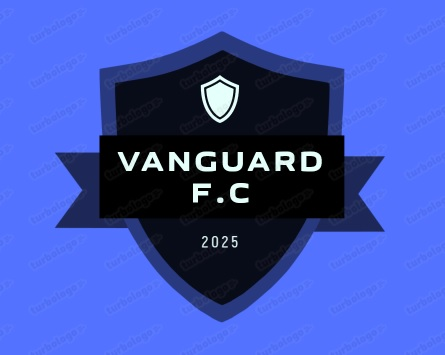

In [6]:
VanguarFC = Image.open("C:/Users/usuario/Desktop/S.P/Data/Sport Club/Photos/Vanguard FC.jpg")
VanguarFC

This project is focused on knowing the most relevant statistics of Vanguard F.C (soccer sport club).

In [7]:
## Import data

Athletes = pd.read_excel("C:/Users/usuario/Desktop/S.P/Data/Sport Club/Data_Sport_Club.xlsx",sheet_name="Athletes")
Stats = pd.read_excel("C:/Users/usuario/Desktop/S.P/Data/Sport Club/Data_Sport_Club.xlsx",sheet_name="Stats")
Data = pd.read_excel("C:/Users/usuario/Desktop/S.P/Data/Sport Club/Data_Sport_Club.xlsx",sheet_name="Data")
Tests = pd.read_excel("C:/Users/usuario/Desktop/S.P/Data/Sport Club/Data_Sport_Club.xlsx",sheet_name="Tests")

In [8]:
## Removing null data

Athletes = Athletes.dropna()

In [9]:
Athletes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Athlete_ID           200 non-null    object
 1   First and Last Name  200 non-null    object
 2   Category             200 non-null    object
 3   Condition            200 non-null    object
dtypes: object(4)
memory usage: 7.8+ KB


In [ ]:
## Verifying the the information

In [10]:
Stats.info(),Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Athlete_ID            200 non-null    int64  
 1   % Assistance (Avg)    200 non-null    float64
 2   Summer Cup (minutes)  200 non-null    int64  
 3   Winter Cup (minutes)  200 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 6.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  6 non-null      object
 1   Matches   6 non-null      int64 
 2   Won       6 non-null      int64 
 3   Lost      6 non-null      int64 
 4   Draw      6 non-null      int64 
 5   GF        6 non-null      int64 
 6   GA        6 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 468.0+ bytes


(None, None)

In [11]:
Athletes.info(),Tests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Athlete_ID           200 non-null    object
 1   First and Last Name  200 non-null    object
 2   Category             200 non-null    object
 3   Condition            200 non-null    object
dtypes: object(4)
memory usage: 7.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Athlete_ID            200 non-null    int64  
 1   First and Last Name   200 non-null    object 
 2   Category              200 non-null    object 
 3   Size (cm)             200 non-null    int64  
 4   Weight (kg)           200 non-null    int64  
 5   Speed 10 mts          200 non-null    float64
 6   Speed 30 mts          200 non-null    float64
 7 

(None, None)

In [12]:
## 1.	Categories with the most matches won?

Matches = Data[["Category","Won"]]
Matches.sort_values(by="Won", ascending=False)

,Category,Won
3,U14,28
4,U16,24
5,U18,23
1,U10,21
2,U12,18
0,U8,16


In [15]:
## 2.	What is the number of associated and guest for each category?

Condition = Athletes.groupby("Category")["Condition"]
Condition.value_counts()

Category  Condition
U10       Guest        34
U12       Associate    33
U14       Guest        33
U16       Associate    33
U18       Guest        33
U8        Associate    34
Name: count, dtype: int64

In [25]:
## 3.	What is the average attendance for each category?

AVG = pd.merge(Athletes[["Category", "Athlete_ID"]], Stats[["% Assistance (Avg)", "Athlete_ID"]], on="Athlete_ID")
AVG_Attendance = AVG.groupby("Category")["% Assistance (Avg)"].mean().round(2)
AVG_Attendance

Category
U10    84.27
U12    85.31
U14    84.12
U16    85.13
U18    85.23
U8     84.35
Name: % Assistance (Avg), dtype: float64

In [32]:
## 4.	Who are the 10 players with the most minutes?

Stats["Total_minutes"] = Stats["Summer Cup (minutes)"] + Stats["Winter Cup (minutes)"]
Top_10_minutes = pd.merge(Athletes[["First and Last Name", "Athlete_ID"]],
                          Stats[["Total_minutes","Athlete_ID"]], on="Athlete_ID")
Top_10_minutes.sort_values(by="Total_minutes", ascending=False).head(10)

,First and Last Name,Athlete_ID,Total_minutes
6,Mary King,7,1043
115,Andrew Smith,116,1039
3,Charles Harris,4,1038
40,Charles Martin,41,1012
100,Mary Mitchell,101,1011
199,Sophia Campbell,200,1008
82,John Davis,83,1001
39,Andrew Mitchell,40,994
95,Sophia Moore,96,994
17,George King,18,987


In [37]:
## 5.	Who are the 3 fastest players by category (speed 30 mts)?

Speed = Tests.sort_values(by="Speed 30 mts", ascending=True)
Top_3_Speed = Speed.groupby("Category").head(3)
Top_3_Speed[["First and Last Name","Category","Speed 30 mts"]]



,First and Last Name,Category,Speed 30 mts
41,Sophia Baker,U18,5.40
101,John Clark,U18,5.42
53,John Baker,U18,5.43
88,Charles Lee,U16,5.52
58,John Lewis,U16,5.52
118,Valentina Smith,U16,5.53
111,John Walker,U14,5.61
45,Charles Young,U14,5.64
51,Mary White,U14,5.66
68,John Adams,U12,5.80


In [ ]:
## 6.	Relationship between weight and horizontal jump.

